In [ ]:
# import tensorflow.keras as keras
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:

x_train.shape

(50000, 32, 32, 3)

In [ ]:

x_test.shape

(10000, 32, 32, 3)

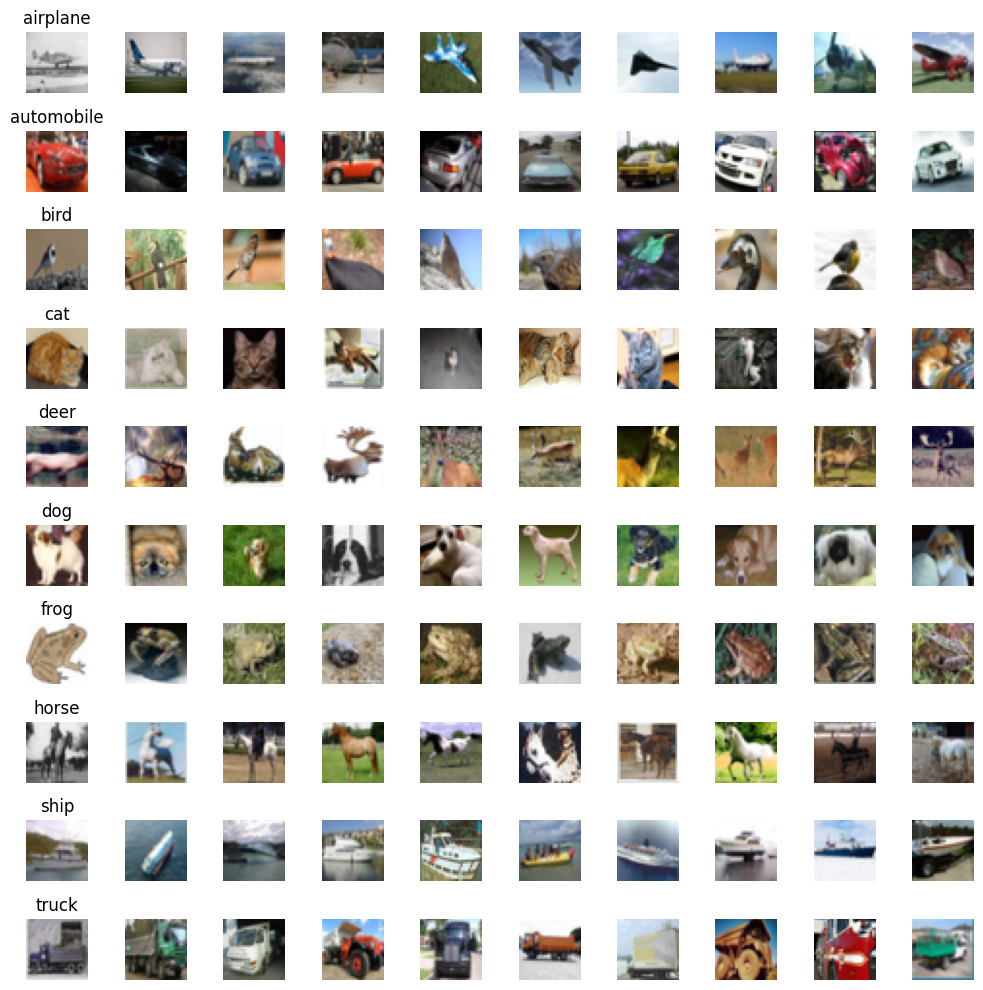

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure with 10 subplots for each class
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

# Loop over each class and select 10 random examples
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)
    for j, idx in enumerate(selected_indices):
        # Display image in subplot
        ax[i, j].imshow(x_train[idx])
        ax[i, j].axis('off')
        # Set title as class name
        if j == 0:
            ax[i, j].set_title(class_names[i])

plt.tight_layout()
plt.show()

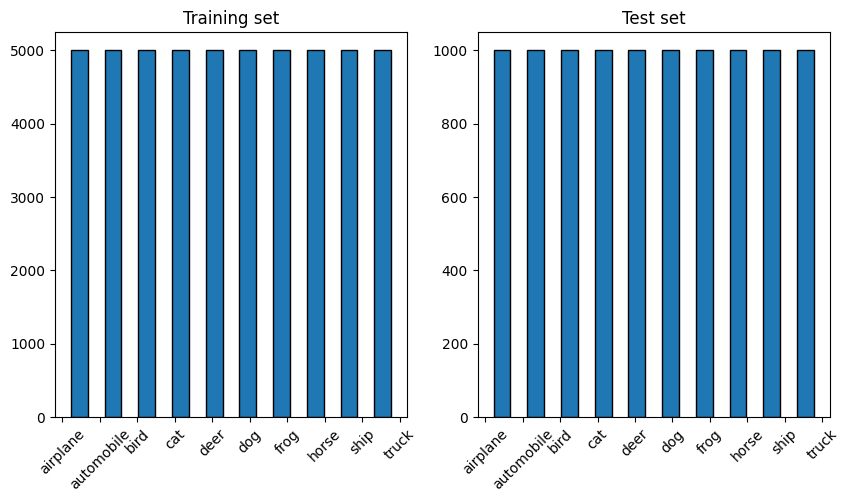

In [ ]:

# Count the number of examples per class in the training and test sets
train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

# Plot the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(y_train, bins=len(train_counts), edgecolor='black',rwidth=0.5)
ax1.set_xticks(np.arange(10))
ax1.set_xticklabels(class_names, rotation=45)
ax1.set_title('Training set')

ax2.hist(y_test, bins=len(test_counts), edgecolor='black',rwidth=0.5)
ax2.set_xticks(np.arange(10))
ax2.set_xticklabels(class_names, rotation=45)
ax2.set_title('Test set')

plt.show()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

## data augmentation

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")

In [ ]:
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 32
train_generator  = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator  = test_datagen.flow(x_test, y_test, batch_size=batch_size)


# x, y = train_generator.next()
# fig, ax = plt.subplots(nrows=4, ncols=8)
# for i in range(batch_size):
#     image = x[i]
#     ax.flatten()[i].imshow(np.squeeze(image))
# plt.show()

In [ ]:
train_datagen.fit(x_train)
test_datagen.fit (x_test)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_model = model.fit(
      train_generator,
      steps_per_epoch=len(x_train)/batch_size,
      epochs=15,
      validation_data=test_generator,
      validation_steps=50)

Epoch 1/15
1562/1562 [==============================] - 39s 23ms/step - loss: 1.4690 - accuracy: 0.4744 - val_loss: 1.6734 - val_accuracy: 0.4725
Epoch 2/15
1562/1562 [==============================] - 36s 23ms/step - loss: 1.1262 - accuracy: 0.6041 - val_loss: 1.0094 - val_accuracy: 0.6469
Epoch 3/15
1562/1562 [==============================] - 39s 25ms/step - loss: 1.0084 - accuracy: 0.6475 - val_loss: 1.2621 - val_accuracy: 0.5881
Epoch 4/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9399 - accuracy: 0.6737 - val_loss: 1.0322 - val_accuracy: 0.6794
Epoch 5/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8944 - accuracy: 0.6899 - val_loss: 0.8603 - val_accuracy: 0.6956
Epoch 6/15
1562/1562 [==============================] - 35s 23ms/step - loss: 0.8490 - accuracy: 0.7067 - val_loss: 0.8454 - val_accuracy: 0.7350
Epoch 7/15
1562/1562 [==============================] - 35s 22ms/step - loss: 0.8212 - accuracy: 0.7166 - val_loss: 0.8010 -

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

313/313 [==============================] - 2s 5ms/step - loss: 0.6309 - accuracy: 0.7831


In [ ]:
test_acc

0.7831000089645386

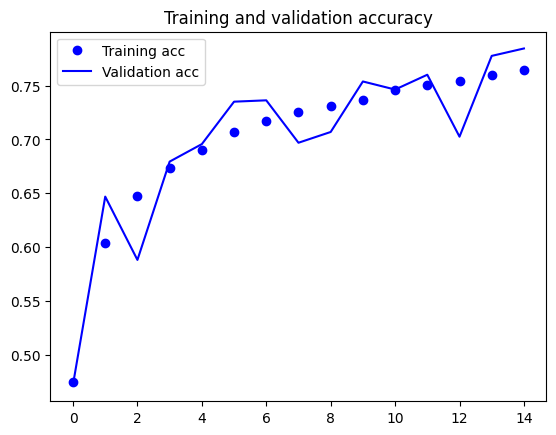

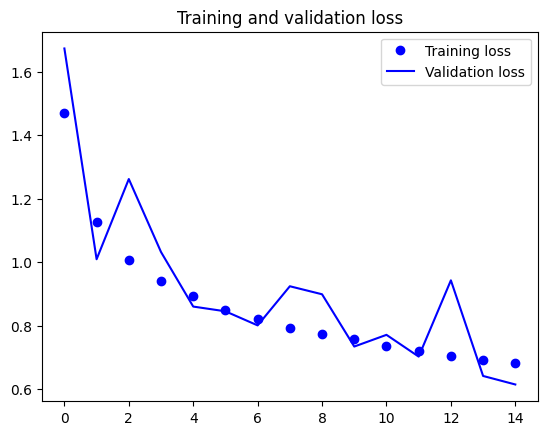

In [ ]:
acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Transfer Learning

In [ ]:
from keras.applications import VGG16

conv_VGG = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = Sequential()
model.add(conv_VGG)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
conv_VGG.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
from keras import optimizers
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=15, 
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
batch_size = 32
train_generator  = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator  = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_model = model.fit(
      train_generator,
      steps_per_epoch=len(x_train)//batch_size,
      epochs=15,
      validation_data= test_generator,
      validation_steps=len(x_test)//batch_size)

Epoch 1/15
1562/1562 [==============================] - 58s 30ms/step - loss: 1.3082 - accuracy: 0.5525 - val_loss: 1.0136 - val_accuracy: 0.6444
Epoch 2/15
1562/1562 [==============================] - 46s 29ms/step - loss: 1.1132 - accuracy: 0.6091 - val_loss: 0.9820 - val_accuracy: 0.6606
Epoch 3/15
1562/1562 [==============================] - 43s 27ms/step - loss: 1.0684 - accuracy: 0.6235 - val_loss: 0.9473 - val_accuracy: 0.6666
Epoch 4/15
1562/1562 [==============================] - 43s 28ms/step - loss: 1.0345 - accuracy: 0.6372 - val_loss: 0.9414 - val_accuracy: 0.6712
Epoch 5/15
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0052 - accuracy: 0.6438 - val_loss: 0.9405 - val_accuracy: 0.6726
Epoch 6/15
1562/1562 [==============================] - 45s 29ms/step - loss: 0.9892 - accuracy: 0.6530 - val_loss: 0.9084 - val_accuracy: 0.6813
Epoch 7/15
1562/1562 [==============================] - 46s 30ms/step - loss: 0.9693 - accuracy: 0.6588 - val_loss: 0.9124 -

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

313/313 [==============================] - 3s 10ms/step - loss: 0.9443 - accuracy: 0.6864


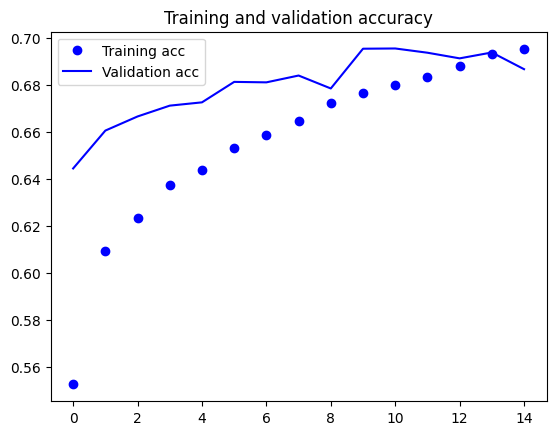

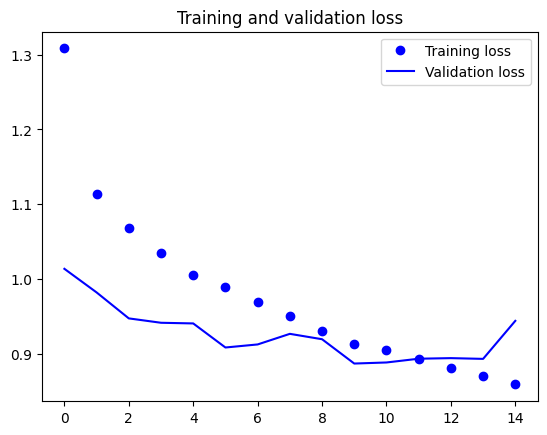

In [ ]:
acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine-tuning

In [ ]:
conv_VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

block5_conv1, block5_conv2 and block5_conv3 => trainable.

In [ ]:
conv_VGG.trainable = True

set_trainable = False
for layer in conv_VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_model = model.fit(
      train_generator,
      steps_per_epoch=len(x_train)//batch_size,
      epochs=15,
      validation_data= test_generator,
      validation_steps=len(x_test)//batch_size)

Epoch 1/15
1562/1562 [==============================] - 57s 34ms/step - loss: 1.0154 - accuracy: 0.6430 - val_loss: 1.0119 - val_accuracy: 0.7053
Epoch 2/15
1562/1562 [==============================] - 53s 34ms/step - loss: 0.8418 - accuracy: 0.7071 - val_loss: 0.7617 - val_accuracy: 0.7420
Epoch 3/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.7444 - accuracy: 0.7441 - val_loss: 0.7556 - val_accuracy: 0.7522
Epoch 4/15
1562/1562 [==============================] - 52s 33ms/step - loss: 0.6925 - accuracy: 0.7610 - val_loss: 2.2997 - val_accuracy: 0.7558
Epoch 5/15
1562/1562 [==============================] - 52s 33ms/step - loss: 0.6547 - accuracy: 0.7721 - val_loss: 1.6416 - val_accuracy: 0.7716
Epoch 6/15
1562/1562 [==============================] - 49s 32ms/step - loss: 0.6249 - accuracy: 0.7843 - val_loss: 2.9929 - val_accuracy: 0.7577
Epoch 7/15
1562/1562 [==============================] - 49s 32ms/step - loss: 0.5932 - accuracy: 0.7951 - val_loss: 5.7161 -

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

313/313 [==============================] - 3s 10ms/step - loss: 6.7963 - accuracy: 0.7867


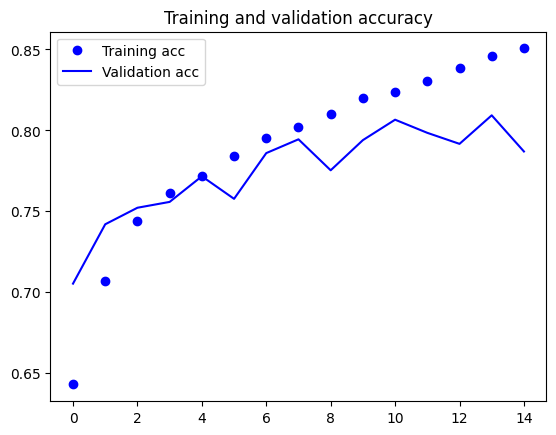

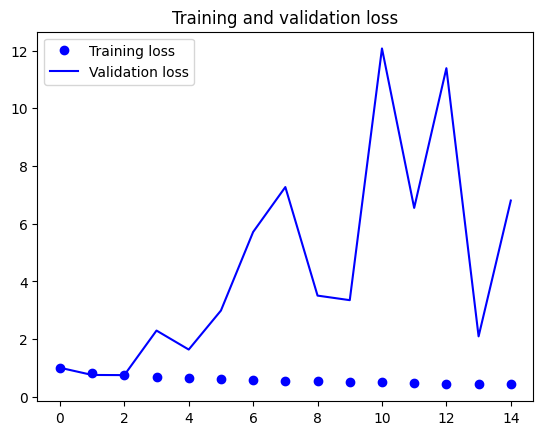

In [ ]:
acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()